# Visualisation of the electrostatic field around a charged circular plate

This notebook shows how to numerically calculate and visualise the fields around a circular homogeneously charged insulating plate.
(C) Jo Verbeeck, EMAT, University of Antwerp,  sept 2019

load the required libraries for calculation and plotting

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Create a polar grid to describe infinitesimal charged areas that make up the plate

In [27]:
rpoints=100 #nr of radial points on the plate
thetapoints=100 #number of azimuthal steps
rmax=1 #extension of grid [m]
pref=9e9 # 1/(4pi eps0)
sigma=1 #surface charge density [C/m^2]
r=np.linspace(0,rmax,rpoints)
dr=r[2]-r[1]
theta=np.linspace(2*np.pi/thetapoints,2*np.pi,thetapoints) #careful, avoid double counting of theta=0 and theta=2pi
dtheta=theta[2]-theta[1]
[r2d,theta2d]=np.meshgrid(r,theta,indexing='ij') #2D matrices holding x or y coordinate for each point on the grid

#cartesian coordinates for each element in the plate
x2dp=np.multiply(r2d,np.cos(theta2d))
y2dp=np.multiply(r2d,np.sin(theta2d))

Define a grid for the plane in which we want to get the field information (is 3D but this is hard to visualise so we choose a single 2D plane perpendicular to the disc and cutting through the center of the disc

In [32]:
xpoints=100
zpoints=100
xmax=3*rmax
zmax=xmax
x=np.linspace(-xmax,xmax,xpoints)
z=np.linspace(-zmax,zmax,zpoints)
x2d,z2d=np.meshgrid(x,z)

Now perform the integration over the disc summing up all the field stemming from the infinitesimal charged areas using the superposition principle. For clarity I will use the naive way using for loops. This is ridicoulously slow in an interpreted language as python, but it is easier to understand what is happening.

In [33]:
ex=np.zeros(x2d.shape)
ez=np.zeros(x2d.shape)

for rid in range(rpoints):
    for thetaid in range(thetapoints):
        dq=sigma*r[rid]*dr*dtheta #infinitesimal charge in this segment
        rx=x2dp[rid,thetaid]-x2d
        ry=y2dp[rid,thetaid]-0
        rz=0-z2d
        dist=np.sqrt(np.square(rx)+np.square(ry)+np.square(rz)) #distance of this segment to any point in the xz grid
           
        ex=ex+pref*dq*np.multiply(np.power(dist,-3),rx)
        ez=ez+pref*dq*np.multiply(np.power(dist,-3),rz)
        #ey #zero because of symmetry (the plane cuts the disc in half)
e=np.sqrt(np.square(ex)+np.square(ez))        
        
        


And now its showtime!

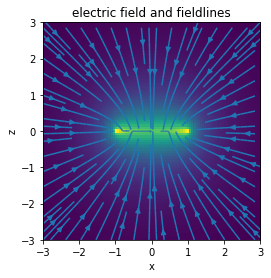

In [34]:
plt.imshow(e,extent=[-xmax, xmax, -xmax, xmax])
plt.title('electric field and fieldlines')
plt.xlabel('x');
plt.ylabel('z');
plt.streamplot(x2d,z2d,ex,ez)
plt.axis('square')
plt.colorbar
plt.show()

Note how far away from the plate, all fieldlines behave as if the plate was a point charge. Only closer to the plate, the field differs.